In [1]:
import pandas as pd
import math , datetime
import numpy as np
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
style.use('ggplot')

In [3]:
df=pd.read_csv('GOOGL.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4431.000000,4431.000000,4431.000000,4431.000000,4431.000000,4.431000e+03
mean,693.087345,699.735595,686.078751,693.097367,693.097367,6.444992e+06
std,645.118799,651.331215,638.579488,645.187806,645.187806,7.690351e+06
min,49.644646,50.920921,48.028027,50.055054,50.055054,4.656000e+05
25%,248.558563,250.853355,245.813309,248.415916,248.415916,1.695600e+06
50%,434.924927,437.887878,432.687683,435.330322,435.330322,3.778418e+06
75%,1007.364990,1020.649994,997.274994,1007.790008,1007.790008,8.002390e+06
max,3025.000000,3030.929932,2977.979980,2996.770020,2996.770020,8.215117e+07


In [6]:
print(df.head())

         Date       Open       High        Low      Close  Adj Close    Volume
0  2004-08-19  50.050049  52.082081  48.028027  50.220219  50.220219  44659096
1  2004-08-20  50.555557  54.594597  50.300301  54.209209  54.209209  22834343
2  2004-08-23  55.430431  56.796799  54.579578  54.754753  54.754753  18256126
3  2004-08-24  55.675674  55.855858  51.836838  52.487488  52.487488  15247337
4  2004-08-25  52.532532  54.054054  51.991993  53.053055  53.053055   9188602


In [7]:
 df['HL_PCT'] = (df['High'] - df['Adj Close']) / df['Adj Close'] * 100.0
 df['PCT_change'] = (df['Adj Close'] - df['Open']) / df['Open'] * 100.0
df = df[['Adj Close','HL_PCT','PCT_change','Volume']]
print(df.head())

   Adj Close    HL_PCT  PCT_change    Volume
0  50.220219  3.707395    0.340000  44659096
1  54.209209  0.710927    7.227004  22834343
2  54.754753  3.729441   -1.218966  18256126
3  52.487488  6.417472   -5.726354  15247337
4  53.053055  1.886789    0.990858   9188602


In [8]:
forecast_col = 'Adj Close'

In [9]:
df.fillna(-99999,inplace=True)

In [10]:
forecast_out = int(math.ceil(0.01*len(df)))
print(forecast_out)

45


In [11]:
df['label'] = df[forecast_col].shift(-forecast_out)

In [12]:
df.dropna(inplace=True)
print(df.head())

   Adj Close    HL_PCT  PCT_change    Volume      label
0  50.220219  3.707395    0.340000  44659096  86.301300
1  54.209209  0.710927    7.227004  22834343  93.793793
2  54.754753  3.729441   -1.218966  18256126  90.990990
3  52.487488  6.417472   -5.726354  15247337  93.078079
4  53.053055  1.886789    0.990858   9188602  96.746750


In [13]:
X = np.array(df.drop('label', axis=1))
df.dropna(inplace=True)
y=np.array(df['label'])


In [14]:
y= np.array(df['label'])
print(len(X),len(y))

4386 4386


In [15]:
print(X.shape,y.shape)

(4386, 4) (4386,)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [17]:

X_subset = X[:-forecast_out]
X_lately = X[-forecast_out:]
X_train_scaled= preprocessing.scale(X_subset)

In [18]:
clf= LinearRegression()
clf.fit(X_train, y_train)


LinearRegression()

In [19]:
accuracy = clf.score(X_test , y_test)

In [20]:
print(accuracy)

0.9827197876399514


In [21]:
print(forecast_out)

45


In [22]:
forecast_set = clf.predict(X_lately)
print(forecast_set,accuracy,forecast_out)

[3072.81298309 3060.22045194 3062.11985273 3104.77955916 3086.67146387
 3036.83651999 3016.33506352 3021.72758281 2946.74936376 3016.07300911
 2949.55244221 2938.5269656  2964.85600724 2944.26201136 2962.25378091
 3048.98525131 3064.51995127 3059.95794634 3061.92520452 3021.02731202
 2976.0860795  3036.14543553 2997.41270664 2939.01874843 2931.51260356
 2970.91430169 3035.67927248 3045.18699806 3060.76748871 3036.73877308
 3035.08781518 3026.5233136  3001.53617575 3000.78301901 2994.06848364
 2872.47012598 2863.15665279 2836.865653   2876.78409671 2895.45786263
 2930.69672042 2883.58781929 2897.88975268 2816.59422491 2807.08675253] 0.9827197876399514 45


In [23]:
df['Forecast'] = np.nan

In [24]:
last_date = df.iloc[-1].name
last_date_datetime = pd.to_datetime(last_date, unit='s')
last_unix = last_date_datetime.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [27]:
for i in forecast_set :
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

In [38]:
print(df.head())

   Adj Close    HL_PCT  PCT_change      Volume      label  Forecast
0  50.220219  3.707395    0.340000  44659096.0  86.301300       NaN
1  54.209209  0.710927    7.227004  22834343.0  93.793793       NaN
2  54.754753  3.729441   -1.218966  18256126.0  90.990990       NaN
3  52.487488  6.417472   -5.726354  15247337.0  93.078079       NaN
4  53.053055  1.886789    0.990858   9188602.0  96.746750       NaN


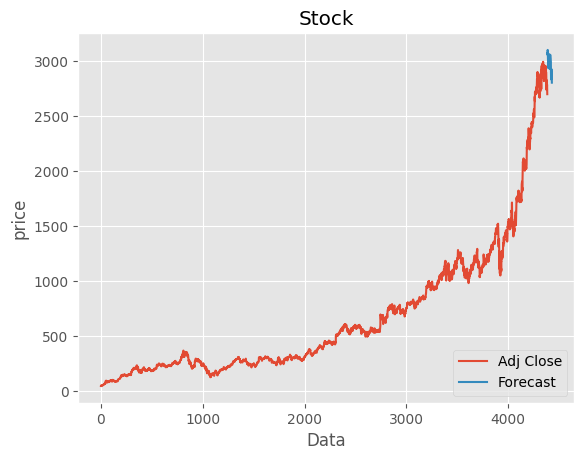

In [36]:
df['Adj Close'].plot()
df['Forecast'].plot()
# plt.legend(loc=4)
# plt.xlabel('Date')
# plt.ylabel('price')
# plt.figure(figsize=(20, 10))
plt.legend(loc=4)  # Adds a legend
plt.grid(True)  # Adds grid lines
plt.title('Stock')  # Adds a title
plt.xlabel('Data')  # Adds an x-axis label
plt.ylabel('price')  # Adds a y-axis label



plt.show()

In [37]:
df.head()

,Adj Close,HL_PCT,PCT_change,Volume,label,Forecast
0,50.220219,3.707395,0.340000,44659096.0,86.301300,NaN
1,54.209209,0.710927,7.227004,22834343.0,93.793793,NaN
2,54.754753,3.729441,-1.218966,18256126.0,90.990990,NaN
3,52.487488,6.417472,-5.726354,15247337.0,93.078079,NaN
4,53.053055,1.886789,0.990858,9188602.0,96.746750,NaN
